# Lab-2: Predictive Modeling with Decision Tree

**Goal:**

**Authors:** Atul Shreewastav & Om Prakash Sharma


In [6]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# adult = fetch_ucirepo(id=2)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('adult.data', header=None)
df

# Add header to csv
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df[df["native-country"] == " ?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [9]:
drop_col = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss']
clean_df = pd.DataFrame(df.drop(drop_col, axis=1))

# remove rows with ? data
for col in clean_df.columns:
    clean_df.drop(clean_df[clean_df[col] == " ?"].index, axis=0, inplace=True)

# # Replace class with 0 and 1
# clean_df["class"] = clean_df["class"].replace(" <=50K", 0)
# clean_df["class"] = clean_df["class"].replace(" >50K", 1)

clean_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [10]:
for col in clean_df.columns:
    print(clean_df[clean_df[col] == " ?"])

Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, class]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, class]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, class]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, class]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, class]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, class]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, o

In [11]:
clean_df.dtypes
cat_columns = clean_df.columns[clean_df.dtypes == 'object']
cat_columns
cat_columns = cat_columns[:-1]
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [12]:
clean_df.describe()

,age,hours-per-week
count,30162.000000,30162.000000
mean,38.437902,40.931238
std,13.134665,11.979984
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


In [13]:
clean_df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [14]:
clean_df = clean_df[~clean_df.duplicated()] # Remove duplicated data

In [15]:
df_encoded = pd.get_dummies(clean_df, columns=cat_columns, dtype=int)

In [16]:
df_encoded

,age,hours-per-week,class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,40,<=50K,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,<=50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,40,>50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,22,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,27,38,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# instantiate a decision tree model using Entropy as the splitting criterion
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
model = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.1445874941)

In [19]:
X = df_encoded.copy()
X.drop('class',axis=1,inplace=True)
X

,age,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,22,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,27,38,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
y = df_encoded['class']
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32554      >50K
32555     <=50K
32556     <=50K
32558     <=50K
32560      >50K
Name: class, Length: 26142, dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [18]:
train_data = pd.concat([X_train, y_train],axis=1)
train_data

,age,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,class
22904,36,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2851,20,20,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3987,37,30,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
27928,61,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
11396,25,37,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792,30,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
8296,27,45,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
21265,19,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
8299,23,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [19]:
entropy_model = DecisionTreeClassifier(criterion='entropy')

In [71]:
entropy_model.fit(X_train, y_train)
y_pred = entropy_model.predict(X_test)
path = entropy_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_entropy, impurities = path.ccp_alphas, path.impurities
ccp_alphas_entropy

array([0.        , 0.        , 0.        , ..., 0.01561634, 0.01878934,
       0.14458749])

In [20]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(150,100))
# plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True)
# plt.show()
entropy_dts = []
for ccp_alpha in ccp_alphas_entropy:
    dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dt_dict = {'dt': dt, 'accuracy': accuracy_score(y_test, dt.predict(X_test)), 'ccp_alpha': ccp_alpha}
    entropy_dts.append(dt_dict)
    

In [21]:
print("ccp_alpha\taccuracy")
print("------------------------")
for dt in entropy_dts:
    print(f"{dt['ccp_alpha']}\t|\t{round(dt['accuracy'], 2)}")

ccp_alpha	accuracy
------------------------
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
1.7063411404315558e-05	|	0.75
2.334387701112931e-05	|	0.75
2.334387701112931e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.440059869464297e-05	|	0.75
2.559

In [22]:
# find the best decision tree model
max_accuracy = 0
best_dt = None
for dt in entropy_dts:
    if dt['accuracy'] > max_accuracy:
        max_accuracy = dt['accuracy']
        best_dt = dt['dt']
        best_ccp_alpha = dt['ccp_alpha']
print(f"Best decision tree model: (ccp_alpha: {best_ccp_alpha}, accuracy: {max_accuracy})")

Best decision tree model: (ccp_alpha: 0.0004083021696554487, accuracy: 0.812565202271937)


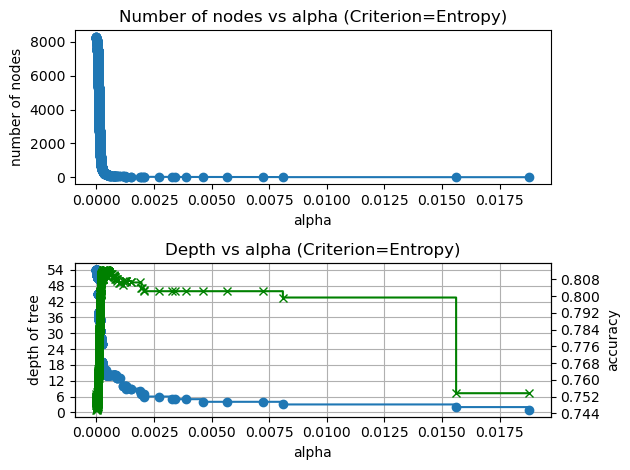

In [23]:
from matplotlib import pyplot as plt
entropy_dts = entropy_dts[:-1]
ccpalphas = [x['ccp_alpha'] for x in entropy_dts]

node_counts = [entropy_dt['dt'].tree_.node_count for entropy_dt in entropy_dts]
depth = [entropy_dt['dt'].tree_.max_depth for entropy_dt in entropy_dts]
accuracy = [entropy_dt['accuracy'] for entropy_dt in entropy_dts]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccpalphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha (Criterion=Entropy)")
ax3 = ax[1].twinx()
# ax[1].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].grid(True)
# ax3.grid(True)
ax3.yaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].plot(ccpalphas, depth, marker="o", drawstyle="steps-post")
# ax[1].plot(ccpalphas, accuracy, marker="x", drawstyle="steps-post")
ax3.plot(ccpalphas, accuracy, marker="x", drawstyle="steps-post", color='g', label='Accuracy')
ax3.set_ylabel("accuracy")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha (Criterion=Entropy)")
fig.tight_layout()

In [65]:
print("ccp_alpha\taccuracy")
print("------------------------")
for dt in gini_dts:
    print(f"{dt['ccp_alpha']}\t|\t{round(dt['accuracy'], 2)}")

ccp_alpha	accuracy
------------------------
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
0.0	|	0.75
8.075519023702099e-06	|	0.75
8.156274213939066e-06	|	0.75
9.187527275471625e-06	|	0.75
1.0603156478120793e-05	|	0.75
1.0705109905795031e-05	|	0.75
1.0705109905795036e-05	|	0.75
1.0705109905795036e-05	|	0.75
1.1101595457861515e-05	|	0.75
1.1312066292977243e-05	|	0.75
1.1418783899514694e-05	|	0.75
1.1418783899514694e-05	|	0.75
1.1418783899514694e-05	|	0.75
1.1418783899514694e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702e-05	|	0.75
1.1418783899514702

[Text(0.5817205255681818, 0.9666666666666667, 'marital-status_ Married-civ-spouse <= 0.5\nentropy = 0.803\nsamples = 17515\nvalue = [13231.0, 4284.0]\nclass =  <=50K'),
 Text(0.2931463068181818, 0.9, 'hours-per-week <= 43.5\nentropy = 0.385\nsamples = 9657\nvalue = [8931, 726]\nclass =  <=50K'),
 Text(0.16583806818181818, 0.8333333333333334, 'age <= 32.5\nentropy = 0.247\nsamples = 7461\nvalue = [7155, 306]\nclass =  <=50K'),
 Text(0.045454545454545456, 0.7666666666666667, 'hours-per-week <= 29.5\nentropy = 0.096\nsamples = 3796\nvalue = [3749, 47]\nclass =  <=50K'),
 Text(0.03409090909090909, 0.7, 'entropy = 0.0\nsamples = 1042\nvalue = [1042, 0]\nclass =  <=50K'),
 Text(0.056818181818181816, 0.7, 'education_ HS-grad <= 0.5\nentropy = 0.125\nsamples = 2754\nvalue = [2707, 47]\nclass =  <=50K'),
 Text(0.03409090909090909, 0.6333333333333333, 'age <= 20.5\nentropy = 0.163\nsamples = 1839\nvalue = [1795, 44]\nclass =  <=50K'),
 Text(0.022727272727272728, 0.5666666666666667, 'entropy = 0.

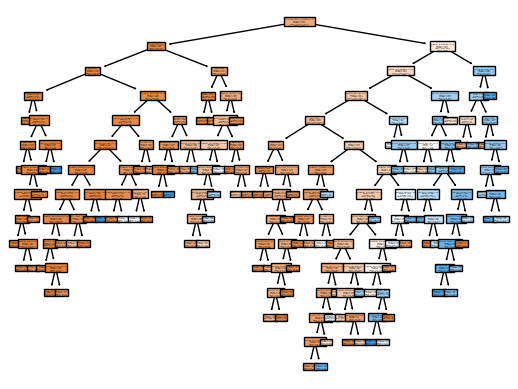

In [24]:
from sklearn.tree import plot_tree
# plt.figure(figsize=(50,75))
plot_tree(best_dt, feature_names=X.columns, class_names=y.unique(), filled=True)

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Exploring a range of depths to control complexity
    'min_samples_split': [2, 10, 20, 30],    # Ensuring nodes have a sufficient number of samples to be split
    'min_samples_leaf': [1, 5, 10, 20]       # Ensuring leaves have a minimum number of samples to avoid overfitting
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy' ,random_state=10)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [23]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=20, ccp_alpha=0.005)
best_dt.fit(X_train, y_train)
plt.figure(figsize=(100, 100))
plot_tree(best_dt, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

RuntimeError: In FT2Font: Can not load face (invalid stream operation; error code 0x55)

Error in callback <function _draw_all_if_interactive at 0x0000020C8FCF9120> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: In FT2Font: Can not load face (invalid stream operation; error code 0x55)

RuntimeError: In FT2Font: Can not load face (invalid stream operation; error code 0x55)

<Figure size 10000x10000 with 1 Axes>

In [25]:
from sklearn.metrics import classification_report
y_pred = best_dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.91      0.87      6502
        >50K       0.63      0.47      0.54      2125

    accuracy                           0.80      8627
   macro avg       0.74      0.69      0.71      8627
weighted avg       0.79      0.80      0.79      8627



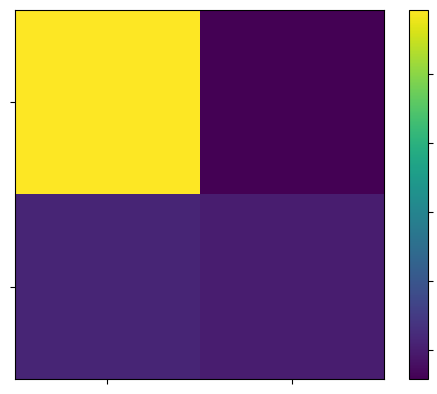

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [89]:
import seaborn as sns

<Axes: >

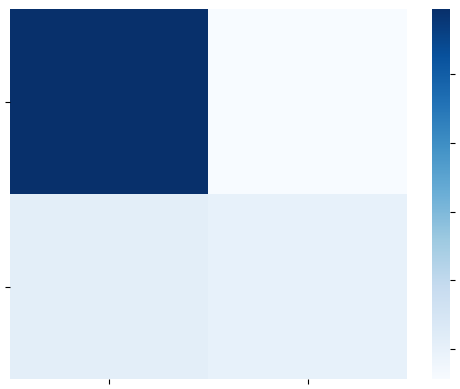

In [90]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.0f')

In [31]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

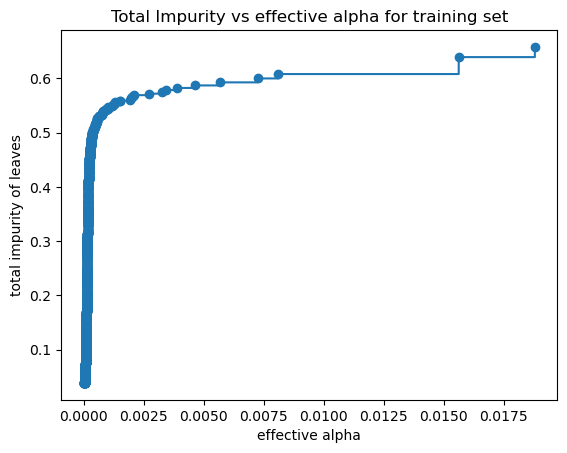

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [50]:
gini_model = DecisionTreeClassifier(criterion='gini')
gini_model.fit(X_train, y_train)
# plot_tree(gini_model, feature_names=X.columns, class_names=y.unique(), filled=True)

DecisionTreeClassifier()

In [51]:
path = gini_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.        , 0.        , ..., 0.00536214, 0.01060498,
       0.0705419 ])

In [52]:
gini_dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dt_dict = {'dt': dt, 'accuracy': accuracy_score(y_test, dt.predict(X_test)), 'ccp_alpha': ccp_alpha}
    gini_dts.append(dt_dict)
 

In [53]:
# find the best decision tree model
max_accuracy = 0
best_dt = None
for dt in gini_dts:
    if dt['accuracy'] > max_accuracy:
        max_accuracy = dt['accuracy']
        best_dt = dt['dt']
        best_ccp_alpha = dt['ccp_alpha']
print(f"Best decision tree model: (ccp_alpha: {best_ccp_alpha}, accuracy: {max_accuracy})")

Best decision tree model: (ccp_alpha: 0.00018600737938161095, accuracy: 0.817549553726672)


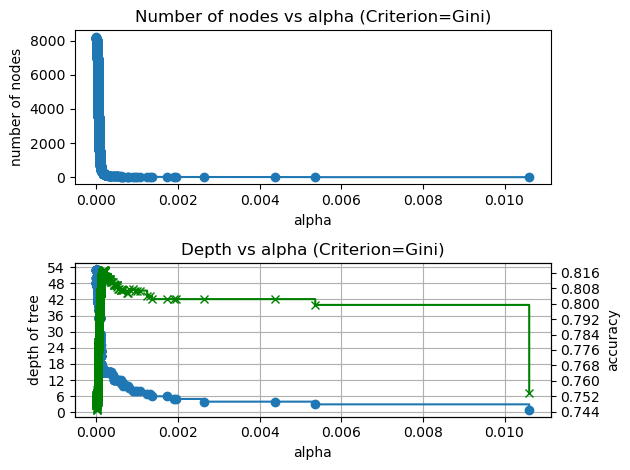

In [54]:
gini_dts = gini_dts[:-1]
ccpalphas = [x['ccp_alpha'] for x in gini_dts]

node_counts = [gini_dt['dt'].tree_.node_count for gini_dt in gini_dts]
depth = [gini_dt['dt'].tree_.max_depth for gini_dt in gini_dts]
accuracy = [gini_dt['accuracy'] for gini_dt in gini_dts]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccpalphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha (Criterion=Gini)")
ax3 = ax[1].twinx()
# ax[1].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].grid(True)
# ax3.grid(True)
ax3.yaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].plot(ccpalphas, depth, marker="o", drawstyle="steps-post")
# ax[1].plot(ccpalphas, accuracy, marker="x", drawstyle="steps-post")
ax3.plot(ccpalphas, accuracy, marker="x", drawstyle="steps-post", color='g', label='Accuracy')
ax3.set_ylabel("accuracy")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha (Criterion=Gini)")
fig.tight_layout()

In [55]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

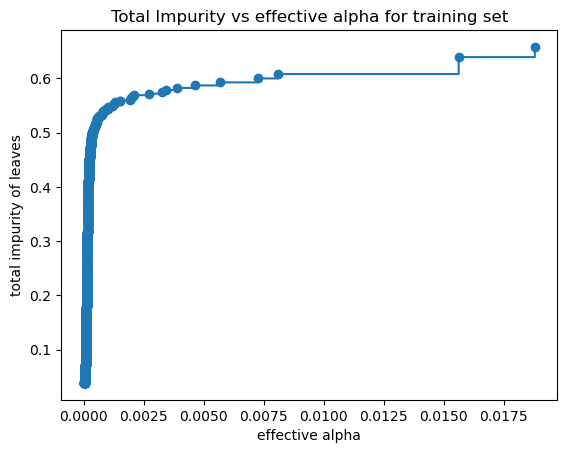

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Exploring a range of depths to control complexity
    'min_samples_split': [2, 10, 20, 30],    # Ensuring nodes have a sufficient number of samples to be split
    'min_samples_leaf': [1, 5, 10, 20]       # Ensuring leaves have a minimum number of samples to avoid overfitting
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='gini' ,random_state=10)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}


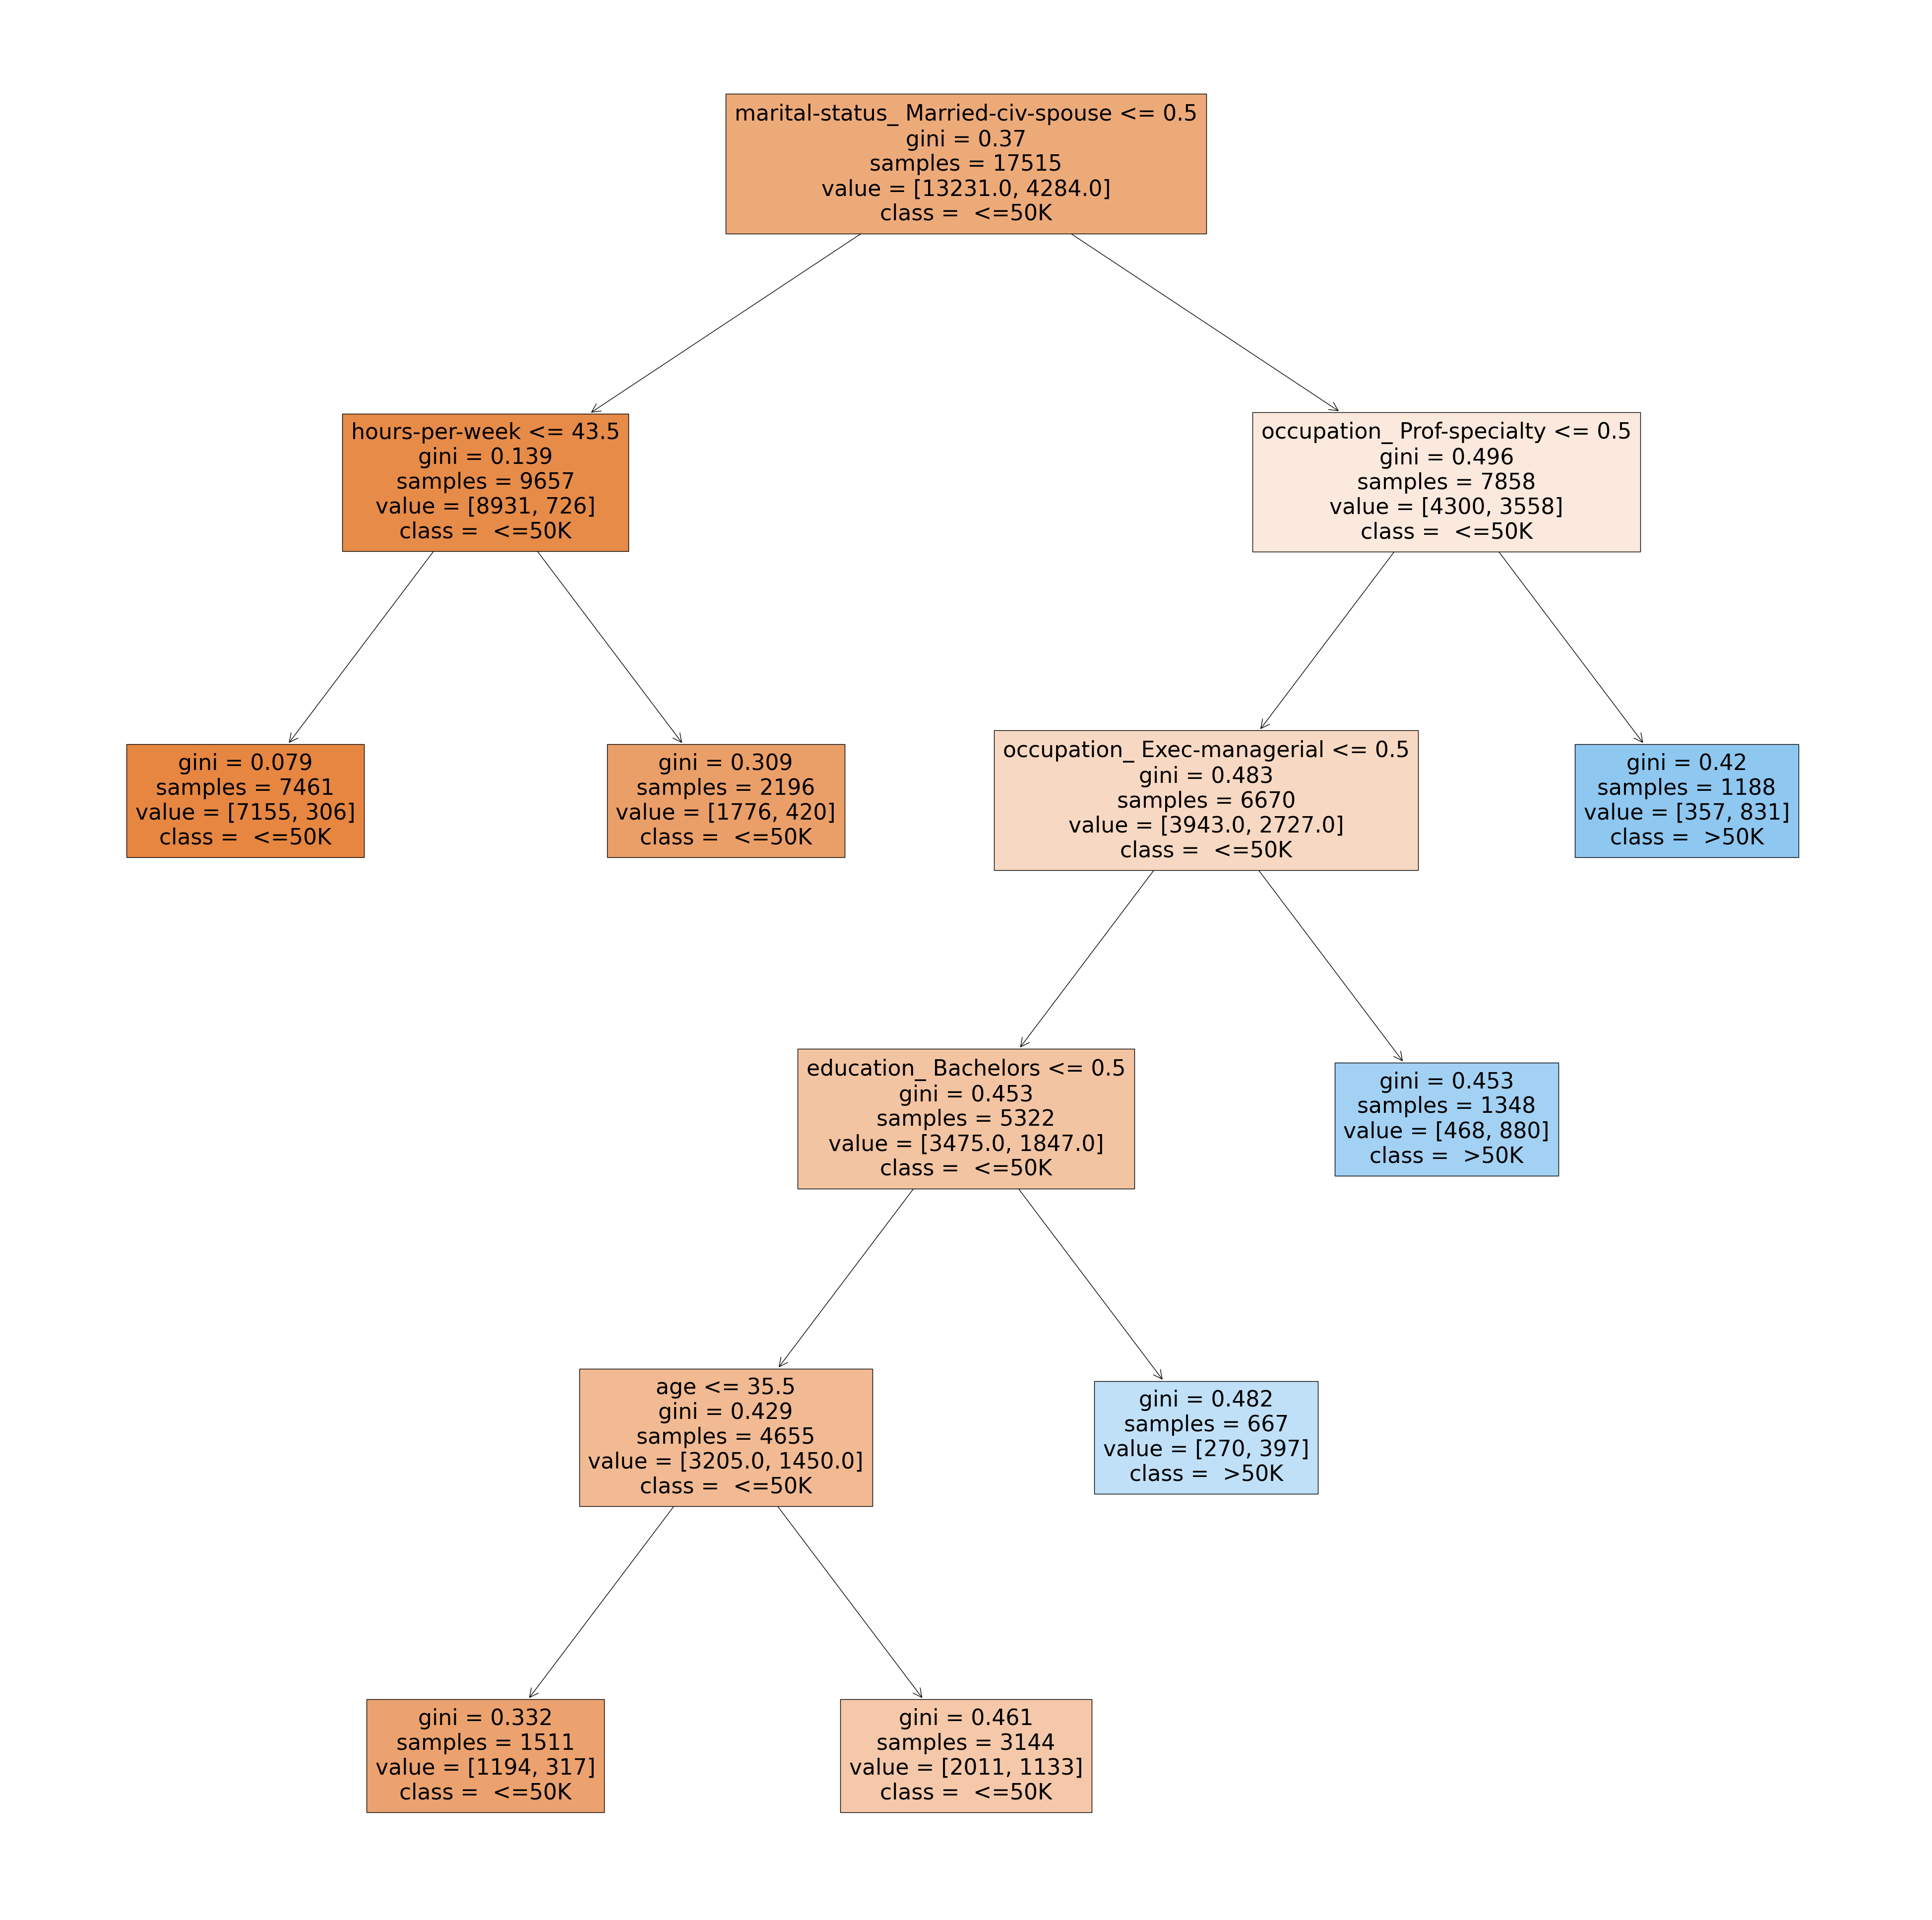

In [73]:
from sklearn.tree import plot_tree
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, min_samples_leaf=2, ccp_alpha=0.002)
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
plt.figure(figsize=(50, 50))
plot_tree(best_dt, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

In [57]:
log_loss_model = DecisionTreeClassifier(criterion="log_loss")
log_loss_model.fit(X_train, y_train)
# plot_tree(log_loss_model, feature_names=X_train.columns, class_names=y.unique(), filled=True)

DecisionTreeClassifier(criterion='log_loss')

In [58]:
path = log_loss_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.        , 0.        , ..., 0.01561634, 0.01878934,
       0.14458749])

In [61]:
from sklearn.metrics import classification_report
y_pred = best_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      6502
        >50K       0.67      0.52      0.58      2125

    accuracy                           0.82      8627
   macro avg       0.76      0.72      0.73      8627
weighted avg       0.81      0.82      0.81      8627

